In [18]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2 
plt.rcParams["figure.figsize"] = (4.5,3.5)
plt.rc('legend', fontsize = 10)
plt.rcParams["legend.framealpha"] = 1

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
path_2_april = '../../data_mac/data_2_04_2024/'
path_9_april = '../../data_mac/data_9_04_2024/'
path_me = '../../data_me/data_2_04_2024/'

paramchar_cav1= "nl5_n1_1_E0.51E-01_dtadd2.00_2.00_4_ar0.0_g0.000_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.419_12.600_bw0.550_mr0.00_0.80_0.00_wd7.419_ad0.0000_off1.00_0.50_anh-0.211_dt0.0100_errl0.1E-03_lsfe14_qb2_cv1.0_tmax500_QUTR2"
dyn_cav1 = da.dynamics(nl=5, path=path_2_april, paramchar=paramchar_cav1)
paramchar_cav1_LONG= "nl5_n1_1_E0.51E-01_dtadd2.00_2.00_4_ar0.0_g0.000_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw0.550_mr0.00_0.80_0.00_wd7.421_ad0.0000_off1.00_0.50_anh-0.211_dt0.0100_errl0.1E-03_lsfe14_qb2_cv1.0_tmax800_QUTR2"
dyn_cav1_LONG = da.dynamics(nl=5, path=path_2_april, paramchar=paramchar_cav1_LONG)

dyns={}
paramchar= "nl5_n1_1_E-0.10E-02_dtadd50.00_50.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw2.200_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.30_anh-0.211_dt0.0010_errl0.1E-08_lsfe16_qb2_cv0.0_tmax500_QUTR2"
dyns['1 lim=1e-9'] = da.dynamics(nl=5, path=path_9_april, paramchar=paramchar)
paramchar= "nl5_n1_1_E-0.10E-02_dtadd50.00_50.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw2.200_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.30_anh-0.211_dt0.0100_errl0.1E-07_lsfe16_qb2_cv0.0_tmax500_QUTR2"
dyns['1 lim=1e-8'] = da.dynamics(nl=5, path=path_9_april, paramchar=paramchar)
paramchar= "nl5_n1_1_E-0.10E-02_dtadd50.00_50.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw2.200_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.30_anh-0.211_dt0.0100_errl0.1E-06_lsfe16_qb2_cv0.0_tmax500_QUTR2"
dyns['1 lim=1e-7'] = da.dynamics(nl=5, path=path_9_april, paramchar=paramchar)
paramchar= "nl5_n1_1_E-0.10E-02_dtadd100.00_100.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw2.200_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.30_anh-0.211_dt0.0100_errl0.1E-05_lsfe16_qb2_cv0.0_tmax500_QUTR2"
dyns['1 lim=1e-6'] = da.dynamics(nl=5, path=path_9_april, paramchar=paramchar)
paramchar= "nl5_n1_1_E-0.10E-02_dtadd100.00_100.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw2.200_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.30_anh-0.211_dt0.0100_errl0.1E-04_lsfe16_qb2_cv0.0_tmax500_QUTR2"
dyns['1 lim=1e-5'] = da.dynamics(nl=5, path=path_9_april, paramchar=paramchar)

paramchar_me= "tmax500_Nq5_Nc25_amp0.0030_kappa0.0012_wq4.4712_anh-0.2112_wc7.4150_g0.0037_wd7.4210_ms1e-02_dimexp20_qb[1,'B']_11_QUTR2.txt"
times_me = np.loadtxt(path_me+"TIMES_"+paramchar_me)
photons_me = np.loadtxt(path_me+"PHOTONS_"+paramchar_me)
pplt_me = np.loadtxt(path_me+"PPLT_"+paramchar_me)

## Decay rate calibration


-- fitted decay rate/(2*np.pi) = 0.0011997885568373124 GHz


/var/folders/18/cf_7vr9s5ysfs04bglxd524h0000gn/T/ipykernel_23251/1642784420.py:4: RuntimeWarning: overflow encountered in exp
  return np.exp( -gamma*t )


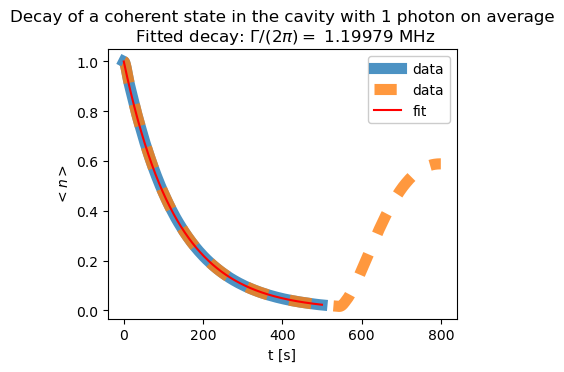

In [21]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cav1.times, dyn_cav1.nk[:,0] )
Gamma=opt[0]

print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cav1.times[1:], dyn_cav1.nk[1:,0], linewidth=8, alpha=0.8,label='data'  )
plt.plot( dyn_cav1_LONG.times[1:], dyn_cav1_LONG.nk[1:,0], linewidth=8, alpha=0.8,dashes=[2,2,2,2],label='data'  )
plt.plot( dyn_cav1.times[1:], exp_decay( dyn_cav1.times[1:], opt[0]), c='red', label='fit'  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()

## CAVITY PHOTON NUMBER and ERROR versus time

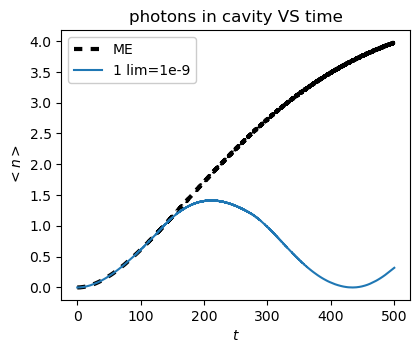

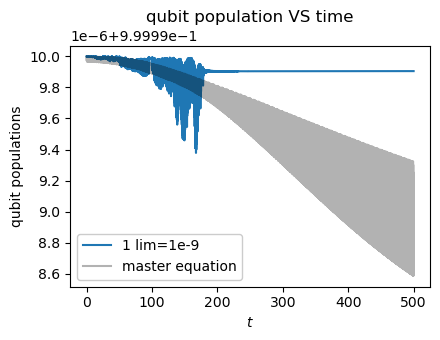

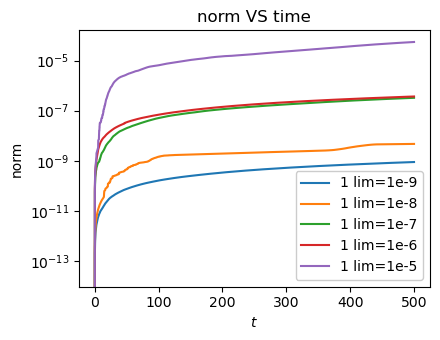

In [23]:
plt.plot( times_me, photons_me, label='ME',c='black', linewidth=3, dashes=[2,2,2,2]  )
for key in ['1 lim=1e-9']:
    plt.plot( dyns[key].times, dyns[key].nk[:,0], label=key  )
#plt.ylim(7,8)
#plt.xlim(225,250)
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.show()

for key in ['1 lim=1e-9']:
    plt.plot( dyns[key].times, dyns[key].pplt[:,1], label=key  )
plt.ylabel( "qubit populations" )
plt.xlabel( "$t$" )
plt.title( "qubit population VS time"  )
plt.plot( times_me, pplt_me[:,1], label='master equation',c='black', alpha=0.3  )  
plt.legend()
plt.tight_layout()
plt.show()

for key in dyns:
    plt.plot( dyns[key].times, np.abs( 1- dyns[key].norm), label=key  )
plt.ylabel( "norm" )
plt.yscale('log')
plt.xlabel( "$t$" )
plt.title( "norm VS time"  )
plt.legend()
plt.tight_layout()
plt.show()

## **Bath photon spectrum**

In [5]:
##for n in dyns:
for key in ['ncs=30 0.02']:
    plt.scatter( dyns[key].wk/(2*np.pi), dyns[key].nk[-1,1:], label=key  )
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.show()

#for n in dyns:
for key in ['ncs=30 0.02']:   
    plt.plot( dyns[key].wk/(2*np.pi), dyns[key].nk[-1,1:], label=key  )
plt.xlim(4.3,4.6)
plt.ylim(0,0.001)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.show()

KeyError: 'ncs=30 0.02'

# **Wigner function of the final state**

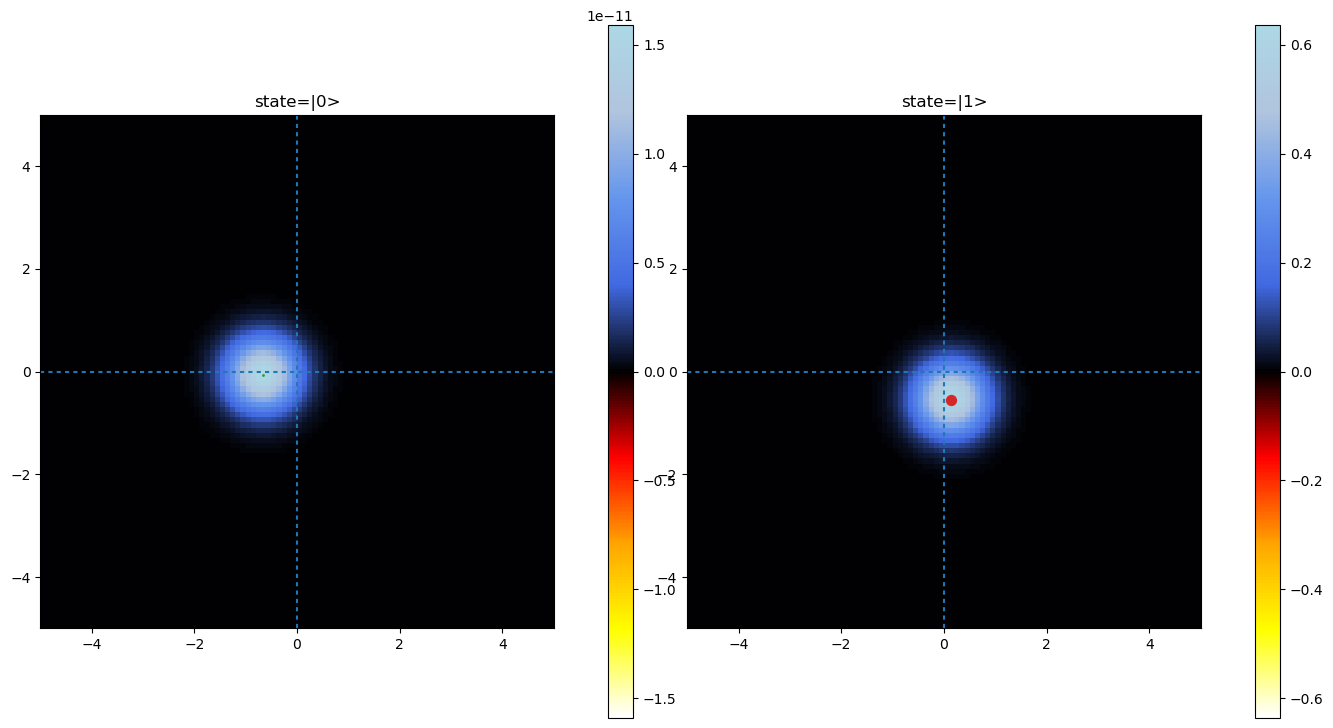

In [25]:
dyns['1 lim=1e-9'].final_state.plot_split_wigners(xmin=-5, add_cs_centers=True)

In [24]:
print( dyns['1 lim=1e-9'].log )

 ========== LOG FILE ============
 
 -- simulation parameter char:
 nl5_n1_1_E-0.10E-02_dtadd50.00_50.00_4_ar0.0_g0.004_gam0.005536_nm300_p0.5E-05_wq4.4712_wc7.415_bc2.400_4.461_7.421_12.600_bw2.200_mr0.00_0.80_0.00_wd7.421_ad0.0030_off1.00_0.30_anh-0.211_dt0.0010_errl0.1E-08_lsfe16_qb2_cv0.0_tmax500_QUTR2                                                             
 
 -- parameters initialised
 -- arrays allocated
 -- trajectory allocated
 -- BARE state initialisation complete
  TIME  ||  DEL t   || err || sol || oth ||  su || ncs || SFE -- SFE                                 
 ------ || -------- || --- || --- || --- || --- || --- || ----------                                 
    0.0 ||        0 ||   0 ||   0 ||   0 ||   0 ||   1 ||  30 --   0                                 
   50.0 ||      129 ||   0 ||   2 ||  16 ||  22 ||   1 ||   0 --   4                                 
  100.0 ||       96 ||   0 ||   2 ||  16 ||  21 ||   1 ||   1 --   2                                 
  150.0